In [130]:
password = None

In [131]:
%reload_ext autoreload
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import getpass
import pandas as pd
import numpy as np

from utils import load_json_benchmarks, filter_results, plot_comparison

In [132]:
repetitions = 5

In [133]:
if password is None:
    password = getpass.getpass()

In [134]:
# Disable cpu frequency scaling
!echo $password | sudo -S cpupower frequency-set -g performance

[sudo] password for fbdtemme: Setting cpu: 0
Setting cpu: 1
Setting cpu: 2
Setting cpu: 3
Setting cpu: 4
Setting cpu: 5
Setting cpu: 6
Setting cpu: 7


In [135]:
!../../cmake-build-release/benchmark/comparison/benchmark-jimporter-bencode \
    --benchmark_repetitions=$repetitions \
    --benchmark_out_format=json \
    --benchmark_out="benchmark-jimporter-bencode.json"

2020-12-24T11:44:30+01:00
Running ../../cmake-build-release/benchmark/comparison/benchmark-jimporter-bencode
Run on (8 X 3800 MHz CPU s)
CPU Caches:
  L1 Data 32 KiB (x4)
  L1 Instruction 32 KiB (x4)
  L2 Unified 256 KiB (x4)
  L3 Unified 6144 KiB (x1)
Load Average: 4.25, 3.16, 2.04
----------------------------------------------------------------------------------------------
Benchmark                                    Time             CPU   Iterations UserCounters...
----------------------------------------------------------------------------------------------
BM_decode_value/"ubuntu"                  8642 ns         8459 ns        68912 bytes_per_second=8.0901G/s
BM_decode_value/"ubuntu"                  9231 ns         9029 ns        68912 bytes_per_second=7.57966G/s
BM_decode_value/"ubuntu"                  7713 ns         7537 ns        68912 bytes_per_second=9.07914G/s
BM_decode_value/"ubuntu"                  8572 ns         8389 ns        68912 bytes_per_second=8.15741G/s
BM_d

In [136]:
!../../cmake-build-release/benchmark/comparison/benchmark-arvidn-libtorrent \
    --benchmark_repetitions=$repetitions \
    --benchmark_out_format=json \
    --benchmark_out="benchmark-arvidn-libtorrent.json"

2020-12-24T11:45:06+01:00
Running ../../cmake-build-release/benchmark/comparison/benchmark-arvidn-libtorrent
Run on (8 X 3800 MHz CPU s)
CPU Caches:
  L1 Data 32 KiB (x4)
  L1 Instruction 32 KiB (x4)
  L2 Unified 256 KiB (x4)
  L3 Unified 6144 KiB (x1)
Load Average: 5.25, 3.54, 2.21
---------------------------------------------------------------------------------------------
Benchmark                                   Time             CPU   Iterations UserCounters...
---------------------------------------------------------------------------------------------
BM_decode_view/"ubuntu"                   711 ns          701 ns      1102755 bytes_per_second=97.5861G/s
BM_decode_view/"ubuntu"                   697 ns          682 ns      1102755 bytes_per_second=100.362G/s
BM_decode_view/"ubuntu"                   718 ns          704 ns      1102755 bytes_per_second=97.2447G/s
BM_decode_view/"ubuntu"                   780 ns          753 ns      1102755 bytes_per_second=90.8403G/s
BM_decode_

In [137]:
!../../cmake-build-release/benchmark/comparison/benchmark-fbdtemme-bencode \
    --benchmark_repetitions=$repetitions \
    --benchmark_out_format=json \
    --benchmark_out="benchmark-fbdtemme-bencode-serial.json"

2020-12-24T11:45:26+01:00
Running ../../cmake-build-release/benchmark/comparison/benchmark-fbdtemme-bencode
Run on (8 X 3800 MHz CPU s)
CPU Caches:
  L1 Data 32 KiB (x4)
  L1 Instruction 32 KiB (x4)
  L2 Unified 256 KiB (x4)
  L3 Unified 6144 KiB (x1)
Load Average: 4.75, 3.54, 2.24
----------------------------------------------------------------------------------------------
Benchmark                                    Time             CPU   Iterations UserCounters...
----------------------------------------------------------------------------------------------
BM_decode_value/"ubuntu"                  4887 ns         4797 ns       134240 bytes_per_second=14.2657G/s
BM_decode_value/"ubuntu"                  5369 ns         5254 ns       134240 bytes_per_second=13.0238G/s
BM_decode_value/"ubuntu"                  5485 ns         5385 ns       134240 bytes_per_second=12.7082G/s
BM_decode_value/"ubuntu"                  5444 ns         5332 ns       134240 bytes_per_second=12.8338G/s
BM_d

In [138]:
!../../cmake-build-release-swar/benchmark/comparison/benchmark-fbdtemme-bencode \
    --benchmark_repetitions=$repetitions \
    --benchmark_out_format=json \
    --benchmark_out="benchmark-fbdtemme-bencode-swar.json"

2020-12-24T11:46:04+01:00
Running ../../cmake-build-release-swar/benchmark/comparison/benchmark-fbdtemme-bencode
Run on (8 X 3800 MHz CPU s)
CPU Caches:
  L1 Data 32 KiB (x4)
  L1 Instruction 32 KiB (x4)
  L2 Unified 256 KiB (x4)
  L3 Unified 6144 KiB (x1)
Load Average: 3.74, 3.42, 2.25
----------------------------------------------------------------------------------------------
Benchmark                                    Time             CPU   Iterations UserCounters...
----------------------------------------------------------------------------------------------
BM_decode_value/"ubuntu"                  3995 ns         3953 ns       184013 bytes_per_second=17.3096G/s
BM_decode_value/"ubuntu"                  4194 ns         4150 ns       184013 bytes_per_second=16.4906G/s
BM_decode_value/"ubuntu"                  4282 ns         4235 ns       184013 bytes_per_second=16.1584G/s
BM_decode_value/"ubuntu"                  4069 ns         4009 ns       184013 bytes_per_second=17.0707G/s

In [139]:
# reenable cpu frequency scaling
!echo $password | sudo -S cpupower frequency-set -g powersave

[sudo] password for fbdtemme: Setting cpu: 0
Setting cpu: 1
Setting cpu: 2
Setting cpu: 3
Setting cpu: 4
Setting cpu: 5
Setting cpu: 6
Setting cpu: 7


In [140]:
# !../../cmake-build-release-avx2/benchmark/comparison/benchmark-fbdtemme-bencode \
#     --benchmark_repetitions=$repetitions \
#     --benchmark_out_format=json \
#     --benchmark_out="benchmark-fbdtemme-bencode-avx2.json"

In [141]:
df = pd.concat([
    filter_results(load_json_benchmarks("benchmark-jimporter-bencode.json"),       "jimporter/bencode"),
    filter_results(load_json_benchmarks("benchmark-arvidn-libtorrent.json"),       "arvidn/libtorrent"),
    # filter_results(load_json_benchmarks("benchmark-fbdtemme-bencode-serial.json"), "fbdtemme/bencode (serial)"),
    filter_results(load_json_benchmarks("benchmark-fbdtemme-bencode-swar.json"),   "fbdtemme/bencode")
])

In [142]:
grouped_df = df.groupby(["library", "test_type", "test_file"])["bytes_per_second"]
results = pd.DataFrame({"mean" : grouped_df.mean(), "stddev": grouped_df.std()})

results_value = results.loc[results.index.get_level_values("test_type") == "decode_value", :]
results_value = results_value.droplevel(1)
results_value = results_value.drop(index = "arvidn/libtorrent")

In [143]:
results_view = results.loc[results.index.get_level_values("test_type") == "decode_view", :]
results_view = results_view.droplevel(1)
results_view

mean        stddev
library           test_file                             
arvidn/libtorrent camelyon17  4.935397e+10  1.011585e+09
                  covid       1.123619e+09  5.099290e+07
                  integers    4.924851e+08  1.263045e+07
                  pneumonia   6.423545e+08  1.501548e+07
                  ubuntu      1.044454e+11  4.170976e+09
fbdtemme/bencode  camelyon17  5.087561e+10  1.382987e+09
                  covid       1.151297e+09  3.574527e+07
                  integers    8.869803e+08  2.081852e+07
                  pneumonia   6.175481e+08  1.217620e+07
                  ubuntu      1.361272e+11  5.395909e+09
jimporter/bencode camelyon17  3.725327e+09  4.029173e+08
                  covid       2.280677e+08  9.129345e+06
                  integers    4.230243e+08  4.910900e+07
                  pneumonia   5.788465e+07  2.667109e+06
                  ubuntu      5.987657e+10  2.218484e+09

<Figure size 432x288 with 0 Axes>

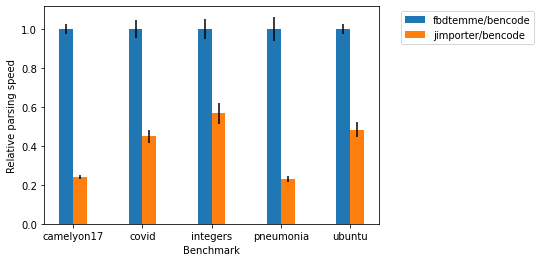

In [144]:
fig = plt.figure()

ax = plot_comparison(results_value)
ax.set_xlabel("Benchmark")

fig.savefig("benchmark-decoding-value.svg")

<Figure size 432x288 with 0 Axes>

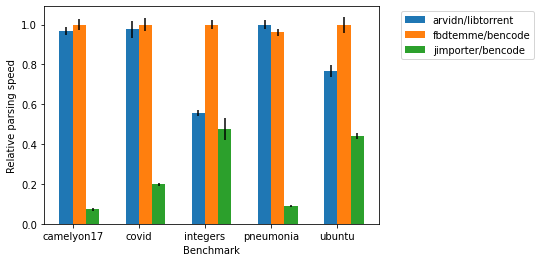

In [145]:
fig = plt.figure()

ax = plot_comparison(results_view)
ax.set_xlabel("Benchmark")

fig.savefig("benchmark-decoding-view.svg")